In [ ]:
#Read in the California ILI dataset

import pandas as pd
from scipy.stats import f_oneway
data = pd.read_csv('/content/flu-ili-byregion-fluseason-ca.csv')

In [ ]:
#View the California ILI dataset

data.head()

,season,date_code,weekending,region,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
0,2001-2002,200140,10/6/2001,Bay Area,3,135,2.22,2
1,2001-2002,200140,10/6/2001,California,25,1211,2.06,14
2,2001-2002,200140,10/6/2001,Central,0,0,NaN,0
3,2001-2002,200140,10/6/2001,Lower Southern,2,336,0.60,4
4,2001-2002,200140,10/6/2001,Northern,20,529,3.78,4


In [ ]:
data['Percent_ILI'].isna().sum()
data[data['Percent_ILI'].isna()]


,season,date_code,weekending,region,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
2,2001-2002,200140,10/6/2001,Central,0,0,NaN,0
8,2001-2002,200141,10/13/2001,Central,0,0,NaN,0
14,2001-2002,200142,10/20/2001,Central,0,0,NaN,0
20,2001-2002,200143,10/27/2001,Central,0,0,NaN,0
26,2001-2002,200144,11/3/2001,Central,0,0,NaN,0
32,2001-2002,200145,11/10/2001,Central,0,0,NaN,0
230,2001-2002,200226,6/29/2002,Central,0,0,NaN,0
236,2001-2002,200227,7/6/2002,Central,0,0,NaN,0
242,2001-2002,200228,7/13/2002,Central,0,0,NaN,0
268,2001-2002,200232,8/10/2002,Northern,0,0,NaN,0


In [ ]:
#See how many NAs are in each column

data.shape
data.isnull().sum()

,0
season,0
date_code,0
weekending,0
region,0
Total_ILI,0
Total_Patients_Seen,0
Percent_ILI,29
Number_Providers_Reporting,0


In [ ]:
#See the column names
data.columns

Index(['season', 'date_code', 'weekending', 'region', 'Total_ILI',
       'Total_Patients_Seen', 'Percent_ILI', 'Number_Providers_Reporting'],
      dtype='object')

In [ ]:
#Run some Summary Statistics
data.describe()

,date_code,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
count,5946.000000,5946.000000,5946.000000,5917.000000,5946.000000
mean,201100.848638,243.233771,10044.406660,2.219153,30.064918
std,548.649431,436.040639,14450.981481,2.171578,34.592072
min,200140.000000,0.000000,0.000000,0.000000,0.000000
25%,200626.000000,16.000000,1602.250000,0.770000,9.000000
50%,201113.000000,76.500000,4674.000000,1.680000,19.000000
75%,201552.000000,289.000000,11753.750000,3.050000,31.000000
max,202039.000000,5791.000000,88000.000000,37.800000,171.000000


In [ ]:
#Check the data types, change weekending to date time and sort

data['weekending'] = pd.to_datetime(data['weekending'])
data = data.sort_values('weekending')

In [ ]:
#modeling by just 2005 onward because of the missingness and an unusually large spike of cases in 2004
data = data[data['weekending'].dt.year >= 2005]   # adjust year cutoff to your data


In [ ]:
#Hypothesis test for regions
regions = data[["region", "Total_ILI"]]
region_groups = [group['Total_ILI'].values for name, group in regions.groupby('region')]

f_stat, p_val = f_oneway(*region_groups)

print(f"F-statistic = {f_stat:.4f}")
print(f"P-value = {p_val:.4f}")

F-statistic = 554.3224
P-value = 0.0000


EDA


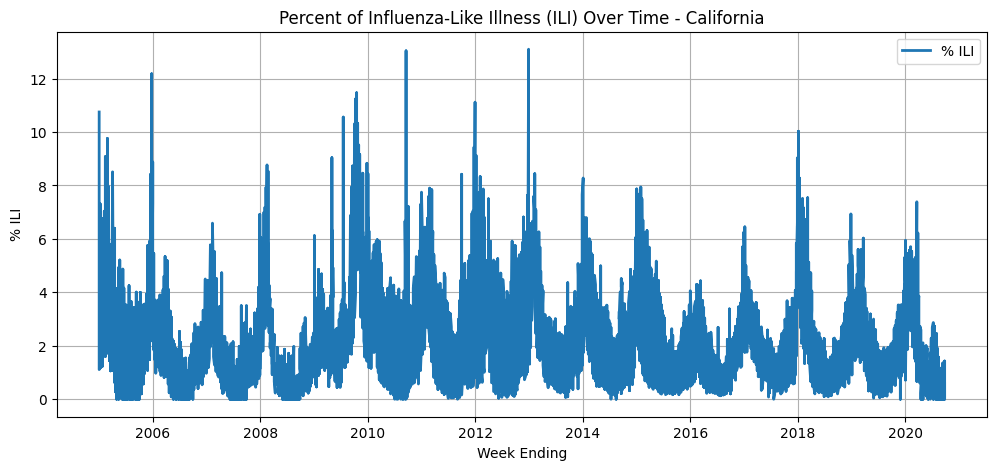

In [ ]:

#Trends of ILI over time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.plot(data['weekending'], data['Percent_ILI'], label='% ILI', linewidth=2)
plt.title('Percent of Influenza-Like Illness (ILI) Over Time - California')
plt.xlabel('Week Ending')
plt.ylabel('% ILI')
plt.grid(True)
plt.legend()
plt.show()

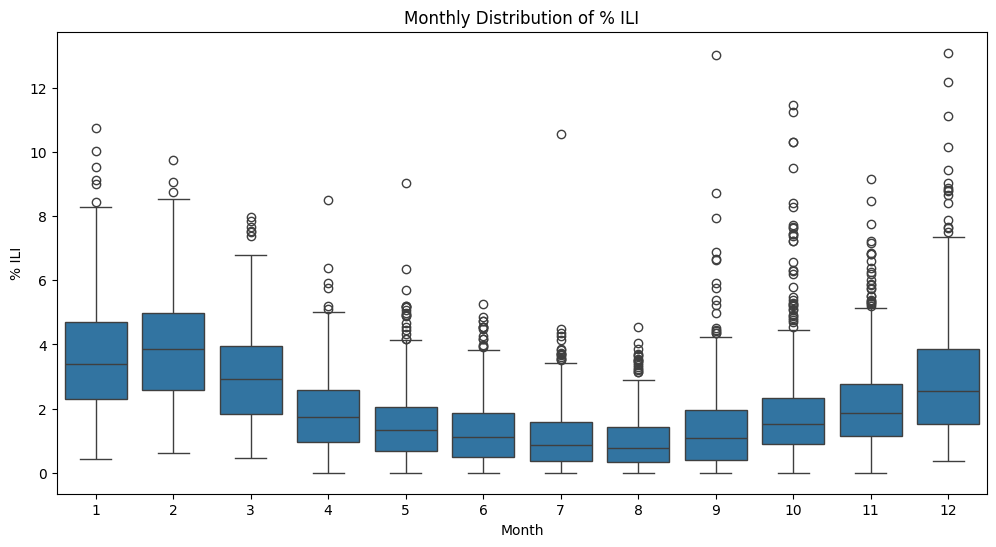

In [ ]:
#Seeing which months have higher cases

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

data['year'] = data['weekending'].dt.year
data['month'] = data['weekending'].dt.month

plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='Percent_ILI', data=data)
plt.title('Monthly Distribution of % ILI')
plt.xlabel('Month')
plt.ylabel('% ILI')
plt.show()

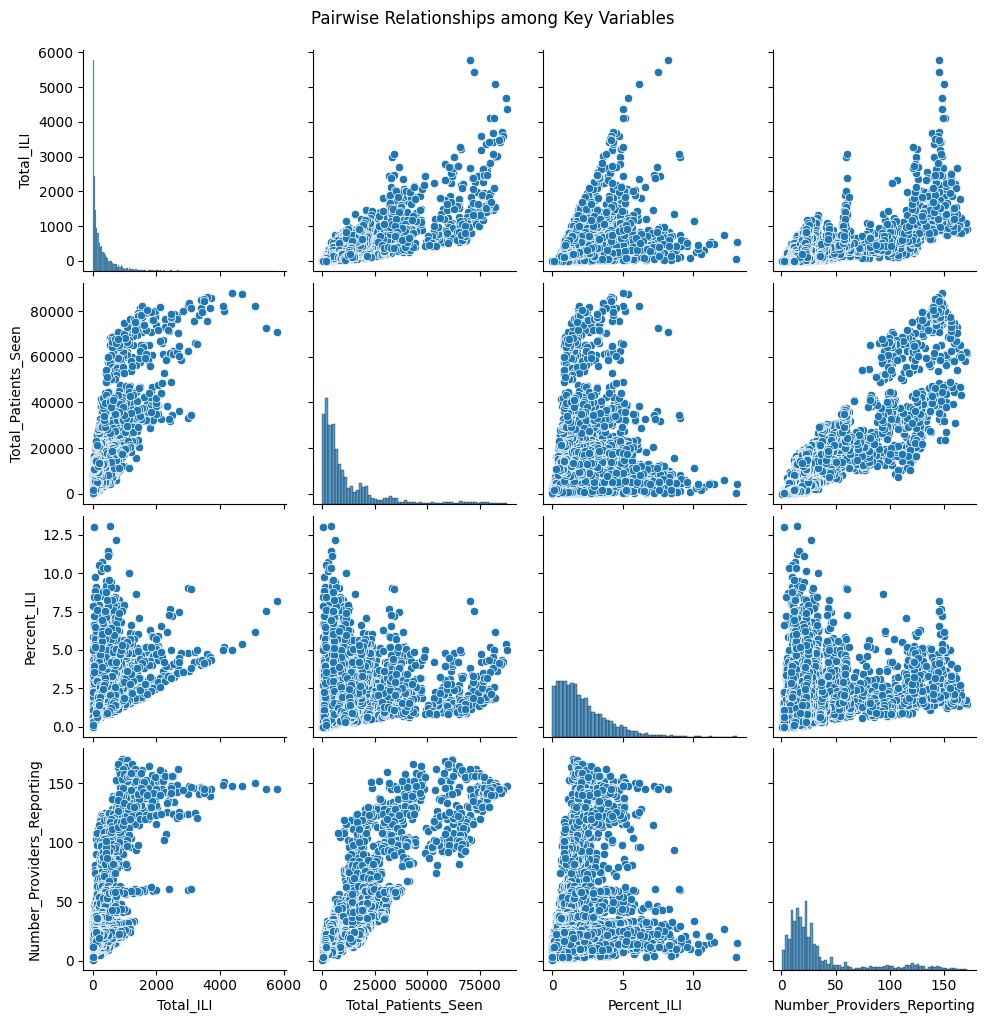

In [ ]:
#Relationships between each variable

sns.pairplot(data[['Total_ILI','Total_Patients_Seen','Percent_ILI','Number_Providers_Reporting']])
plt.suptitle('Pairwise Relationships among Key Variables', y=1.02)
plt.show()

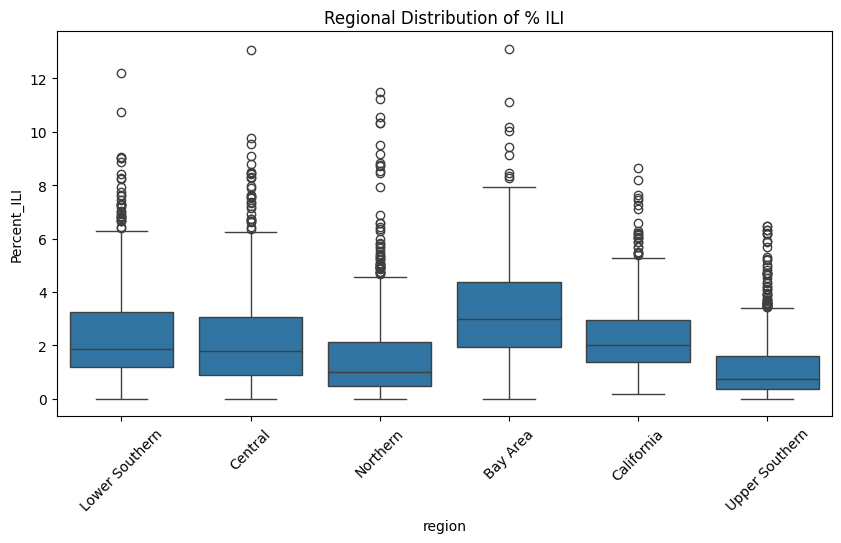

In [ ]:
#ILI by region

plt.figure(figsize=(10,5))
sns.boxplot(x='region', y='Percent_ILI', data=data)
plt.title('Regional Distribution of % ILI')
plt.xticks(rotation=45)
plt.show()

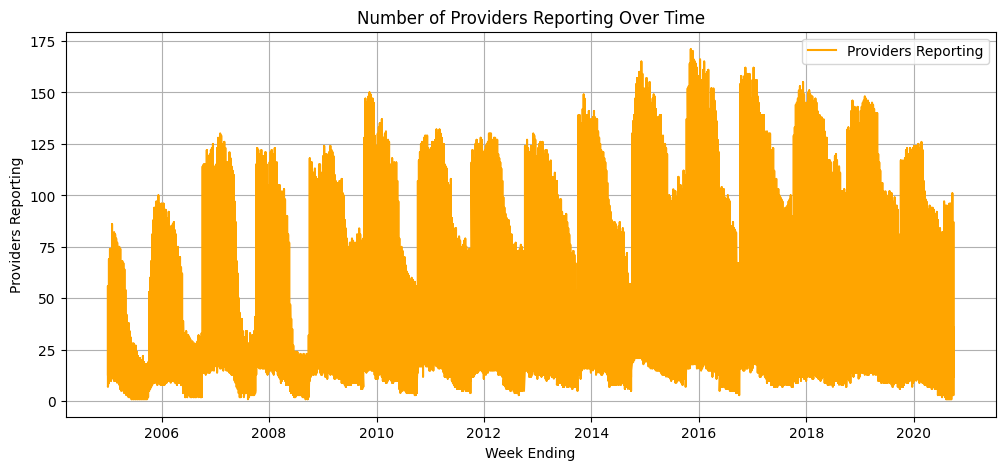

In [ ]:
#number of providers over time

plt.figure(figsize=(12,5))
plt.plot(data['weekending'], data['Number_Providers_Reporting'], color='orange', label='Providers Reporting')
plt.title('Number of Providers Reporting Over Time')
plt.xlabel('Week Ending')
plt.ylabel('Providers Reporting')
plt.grid(True)
plt.legend()
plt.show()

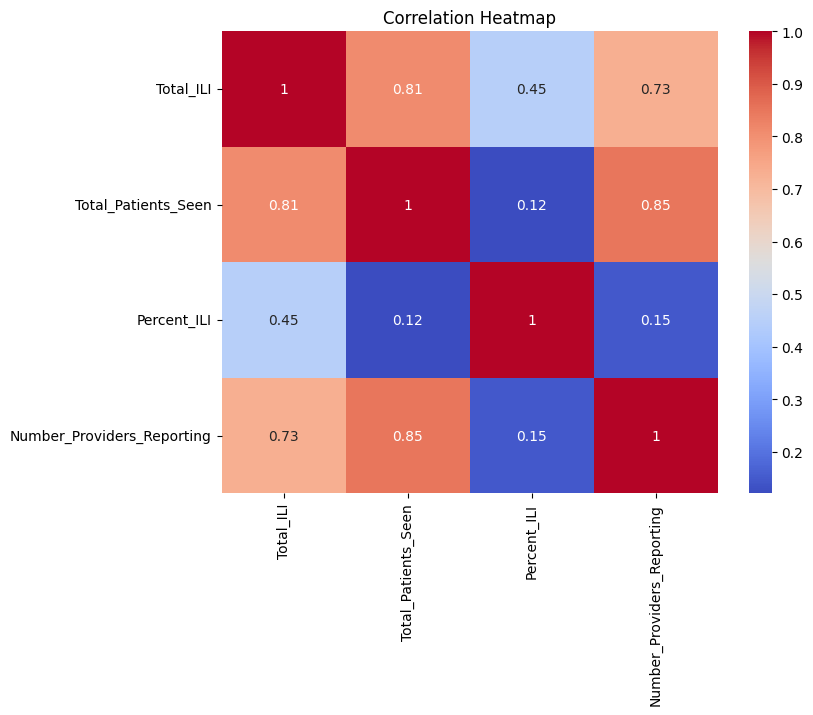

In [ ]:
#Variable correlation heatmap

plt.figure(figsize=(8,6))
sns.heatmap(data[['Total_ILI','Total_Patients_Seen','Percent_ILI','Number_Providers_Reporting']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

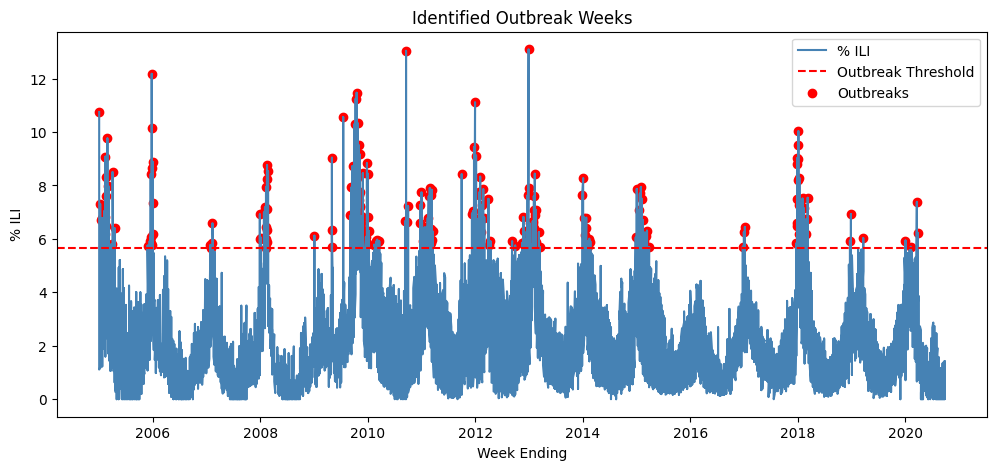

In [ ]:
threshold = data['Percent_ILI'].mean() + 2*data['Percent_ILI'].std()
data['outbreak_flag'] = (data['Percent_ILI'] > threshold).astype(int)

plt.figure(figsize=(12,5))
plt.plot(data['weekending'], data['Percent_ILI'], label='% ILI', color='steelblue')
plt.axhline(threshold, color='red', linestyle='--', label='Outbreak Threshold')
plt.scatter(data.loc[data['outbreak_flag']==1,'weekending'],
            data.loc[data['outbreak_flag']==1,'Percent_ILI'], color='red', label='Outbreaks')
plt.title('Identified Outbreak Weeks')
plt.xlabel('Week Ending')
plt.ylabel('% ILI')
plt.legend()
plt.show()

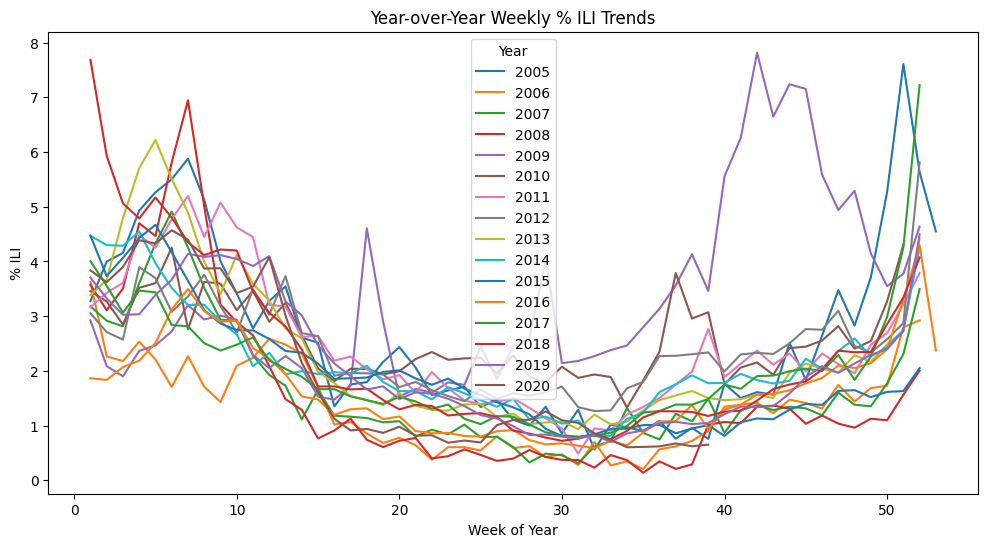

In [ ]:
pivot = data.pivot_table(index=data['weekending'].dt.isocalendar().week,
                       columns=data['year'], values='Percent_ILI')
pivot.plot(figsize=(12,6))
plt.title('Year-over-Year Weekly % ILI Trends')
plt.xlabel('Week of Year')
plt.ylabel('% ILI')
plt.legend(title='Year')
plt.show()

ARIMA Model

In [ ]:
# import all the libraries that i need

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Set the date as the index
data.set_index('weekending', inplace=True)

# Extract the target variable
y = data['Percent_ILI'].astype(float)

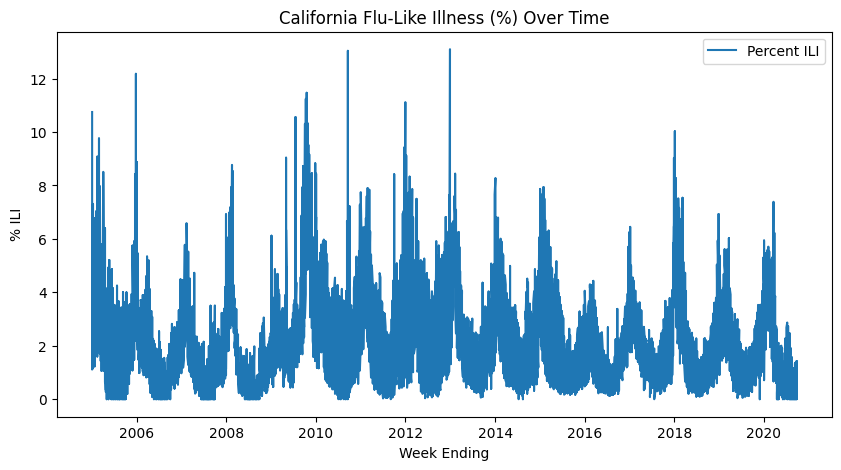

In [ ]:
# Plot the time series
plt.figure(figsize=(10,5))
plt.plot(y, label='Percent ILI')
plt.title('California Flu-Like Illness (%) Over Time')
plt.xlabel('Week Ending')
plt.ylabel('% ILI')
plt.legend()
plt.show()

In [ ]:
# Check stationarity (ADF test)
result = adfuller(y.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("Series likely non-stationary. Differencing recommended.")
else:
    print("Series likely stationary.")

ADF Statistic: -6.1151844880972455
p-value: 9.130750394671479e-08
Series likely stationary.


In [ ]:
#attempting to log transform the data so the sarima performs better
import numpy as np
y_log = np.log1p(y)   # log(1 + y) handles zeros safely

# Split data into train/test
train_size = int(len(y) * 0.85)
train, test = y[:train_size], y[train_size:]


In [ ]:
# Fit ARIMA model
# (p,d,q) parameters can be tuned
model = ARIMA(train, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            Percent_ILI   No. Observations:                 4192
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7141.651
Date:                Mon, 27 Oct 2025   AIC                          14295.303
Time:                        05:03:49   BIC                          14333.348
Sample:                             0   HQIC                         14308.757
                               - 4192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2298      0.342      6.525      0.000       1.560       2.900
ar.L1          1.5227      0.081     18.751      0.000       1.364       1.682
ar.L2         -0.5273      0.080     -6.589      0.0

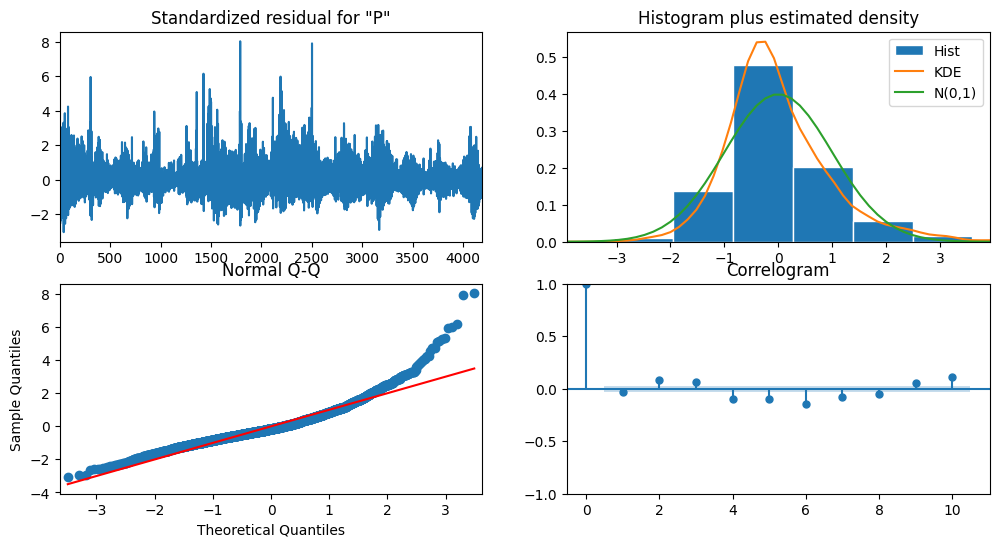

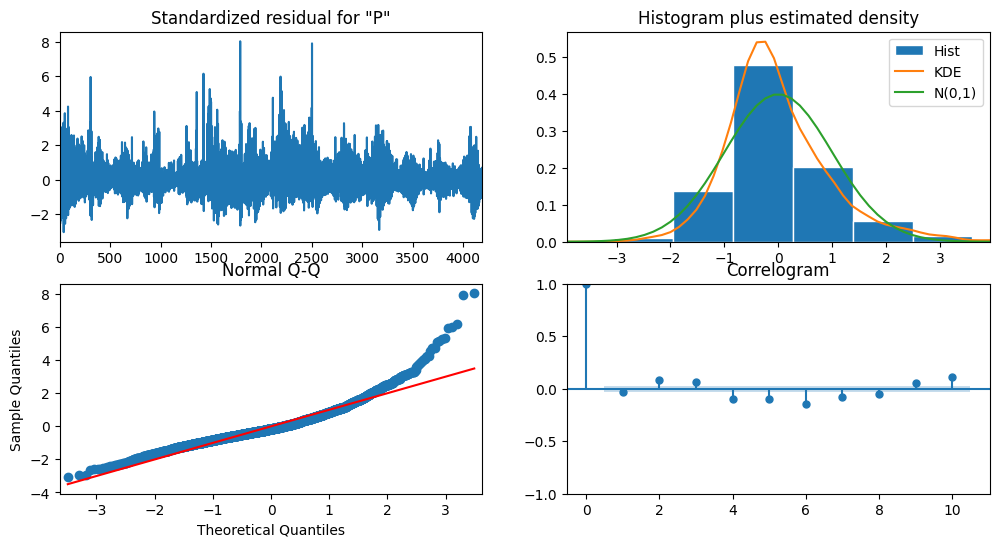

In [ ]:
#checking the residual plots to see if its a good model or not  ARIMA

model_fit.plot_diagnostics(figsize=(12,6))

In [ ]:
#trying SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(y_log, order=(2,0,1), seasonal_order=(1,1,1,52))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Percent_ILI   No. Observations:                 4932
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 52)   Log Likelihood               -2311.951
Date:                            Mon, 24 Nov 2025   AIC                           4635.903
Time:                                    01:21:52   BIC                           4674.860
Sample:                                         0   HQIC                          4649.574
                                           - 4932                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1483      0.017     69.381      0.000       1.116       1.181
ar.L2         -0.1534      0.016     -9.538      0.000      -0.185      -0.122
ma.L1         -0.8983      0.008   -110.069      0.000      -0.914      -0.882
ar.S.L52      -0.0809      0.015     -5.446      0.000      -0.110      -0.052
ma.S.L52      -0.9998      0.462     -2.164      0.030      -1.905      -0.094
sigma2         0.1437      0.066      2.181      0.029       0.015       0.273
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):                 6.79
Prob(Q):                              0.21   Prob(JB):                         0.03
Heteroskedasticity (H):               0.65   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

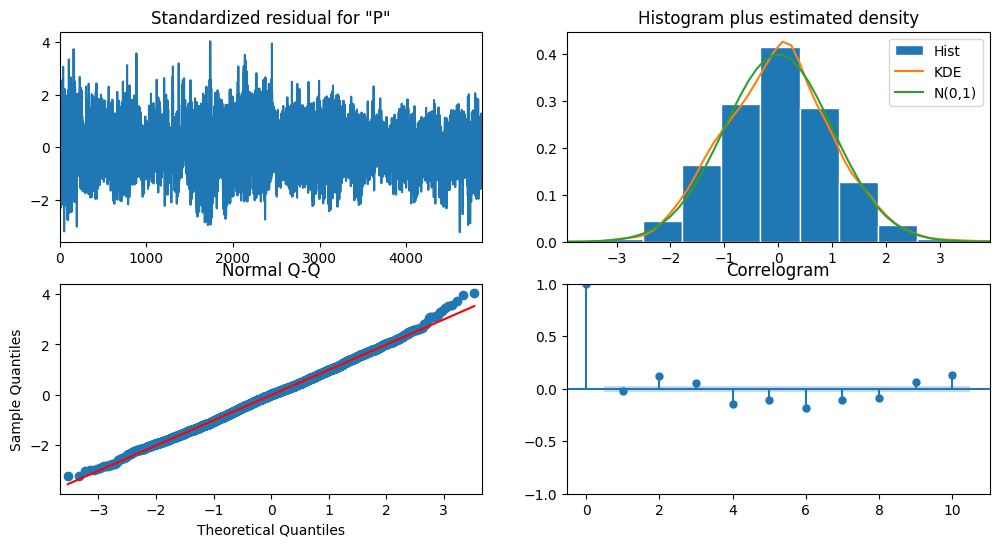

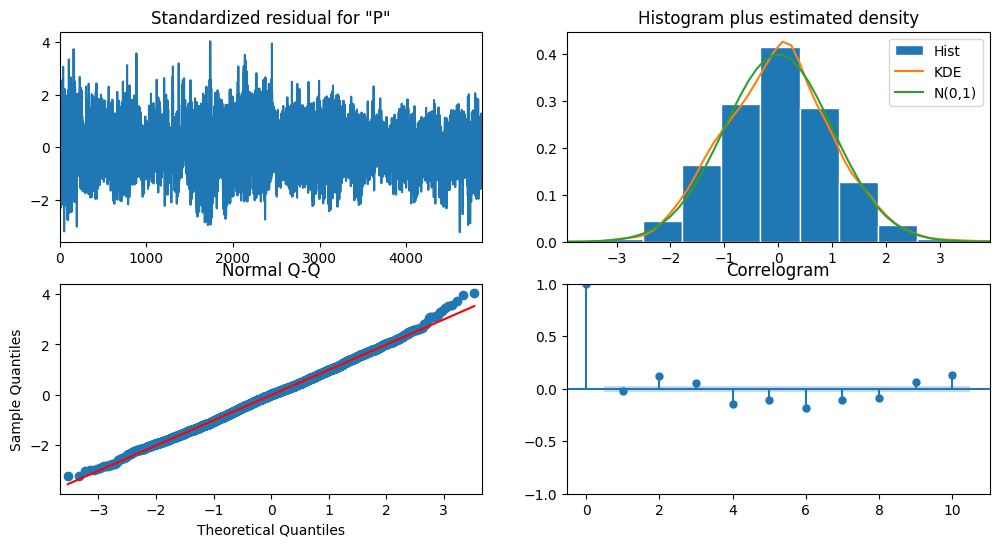

In [ ]:
#plotting the SARIMA model residual plots

model_fit.plot_diagnostics(figsize=(12,6))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


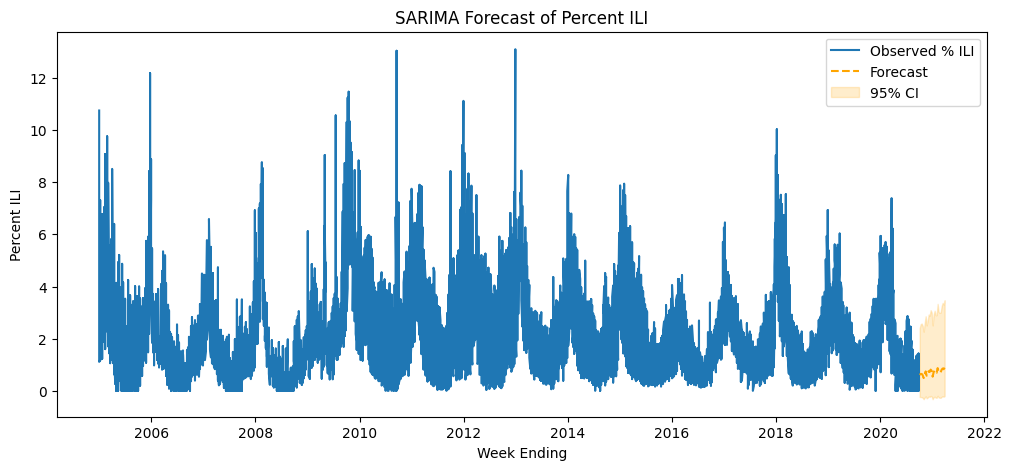

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Forecast n weeks ahead
n_steps = 26
pred = model_fit.get_forecast(steps=n_steps)

# forecast mean and confidence intervals
forecast_mean = np.expm1(pred.predicted_mean)
forecast_ci = np.expm1(pred.conf_int())


last_date = y.index[-1]
future_index = pd.date_range(start=last_date, periods=n_steps+1, freq='W')[1:]
forecast_mean.index = future_index
forecast_ci.index = future_index


plt.figure(figsize=(12,5))
plt.plot(y, label='Observed % ILI')
plt.plot(forecast_mean, label='Forecast', color = 'orange', linestyle='--')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:,1], color='orange', alpha=0.2, label='95% CI')
plt.title('SARIMA Forecast of Percent ILI')
plt.xlabel('Week Ending')
plt.ylabel('Percent ILI')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


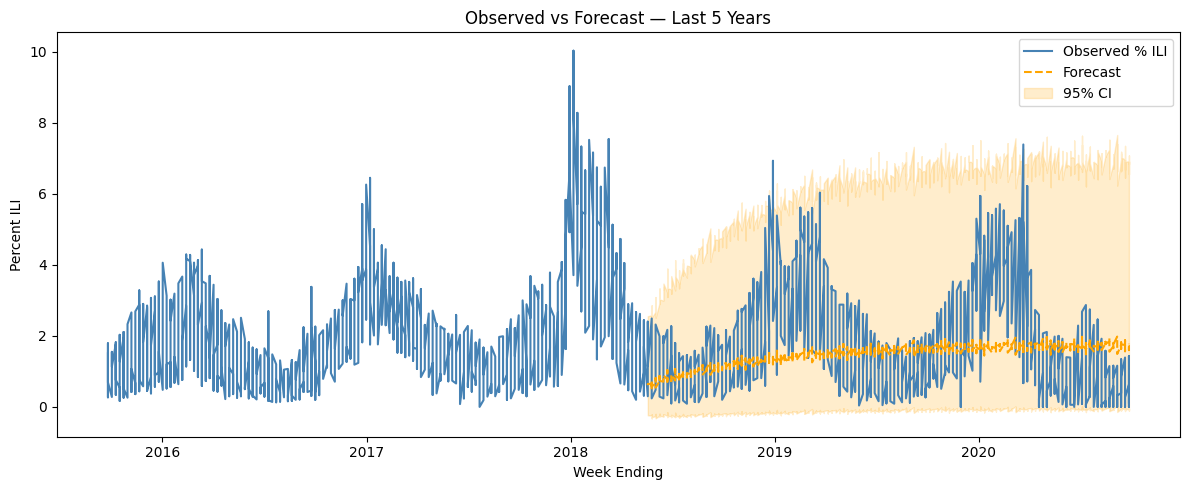

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# forecast the same number of weeks as test set
n_steps = len(test)
pred = model_fit.get_forecast(steps=n_steps)
forecast_mean = np.expm1(pred.predicted_mean)
forecast_ci = np.expm1(pred.conf_int())

# Align forecast index with test set
forecast_mean.index = test.index[:n_steps]
forecast_ci.index = test.index[:n_steps]

# Filter to last 5 years of data
cutoff_date = y.index.max() - pd.DateOffset(years=5)
observed_last5 = y[y.index >= cutoff_date]
forecast_last5 = forecast_mean[forecast_mean.index >= cutoff_date]
ci_last5 = forecast_ci[forecast_ci.index >= cutoff_date]

# observed vs forecast
plt.figure(figsize=(12,5))
plt.plot(observed_last5, label='Observed % ILI', color='steelblue')
plt.plot(forecast_last5, label='Forecast', color='orange', linestyle='--')
plt.fill_between(ci_last5.index,
                 ci_last5.iloc[:,0],
                 ci_last5.iloc[:,1],
                 color='orange', alpha=0.2, label='95% CI')
plt.title('Observed vs Forecast — Last 5 Years')
plt.xlabel('Week Ending')
plt.ylabel('Percent ILI')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Forecast the same number of weeks as test set
n_steps = len(test)
pred = model_fit.get_forecast(steps=n_steps)
forecast_mean = np.expm1(pred.predicted_mean)

# Make sure indexes match
forecast_mean.index = test.index[:n_steps]

# Compute RMSE
rmse = mean_squared_error(test, forecast_mean)
print(f"Test RMSE: {rmse:.3f}")




/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Test RMSE: 2.286
